In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D,MaxPooling2D,Flatten
import pandas as pd


In [ ]:
from tensorflow.keras.preprocessing .image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
x_train=train_datagen.flow_from_directory("../input/alphaxy/pro-ai",target_size = (64,64),batch_size = 32,class_mode = "categorical")
x_test=test_datagen.flow_from_directory("../input/testdatao",target_size = (64,64),batch_size = 32,class_mode = "categorical")

Found 8305 images belonging to 3 classes.
Found 900 images belonging to 3 classes.


In [ ]:
x_train.class_indices

{'animals': 0, 'birds': 1, 'flowers': 2}

In [ ]:

animals=train_datagen.flow_from_directory("../input/alphaxy/pro-ai/animals")

Found 5354 images belonging to 3 classes.


In [ ]:
animals.class_indices

{'gatto': 0, 'mucca': 1, 'pecora': 2}

In [ ]:
birds=train_datagen.flow_from_directory("../input/alphaxy/pro-ai/birds")

Found 450 images belonging to 3 classes.


In [ ]:
birds.class_indices

{'ANTBIRD': 0, 'PEACOCK': 1, 'WILD TURKEY': 2}

In [ ]:
flowers=train_datagen.flow_from_directory("../input/alphaxy/pro-ai/flowers")

Found 2501 images belonging to 3 classes.


In [ ]:
flowers.class_indices

{'rose': 0, 'sunflower': 1, 'tulip': 2}

In [ ]:
model=Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape = (64,64,3)))

In [ ]:
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units = 128, kernel_initializer= "random_uniform",activation = "relu"))

In [ ]:
model.add(Dense(units = 3, kernel_initializer= "random_uniform",activation = "softmax"))

In [ ]:
model.compile(optimizer= "rmsprop",loss = "categorical_crossentropy" , metrics =["accuracy"])

In [ ]:
model.fit_generator(x_train,steps_per_epoch =251 ,epochs = 5, validation_data = x_test,validation_steps =28 )

Epoch 1/5
251/251 [==============================] - 54s 214ms/step - loss: 0.2368 - accuracy: 0.9161 - val_loss: 0.2581 - val_accuracy: 0.9051
Epoch 2/5
251/251 [==============================] - 54s 215ms/step - loss: 0.2189 - accuracy: 0.9222 - val_loss: 0.4511 - val_accuracy: 0.8326
Epoch 3/5
251/251 [==============================] - 55s 221ms/step - loss: 0.2112 - accuracy: 0.9244 - val_loss: 0.7017 - val_accuracy: 0.7746
Epoch 4/5
251/251 [==============================] - 55s 218ms/step - loss: 0.1906 - accuracy: 0.9355 - val_loss: 0.7836 - val_accuracy: 0.7578
Epoch 5/5
251/251 [==============================] - 55s 220ms/step - loss: 0.1977 - accuracy: 0.9320 - val_loss: 0.2424 - val_accuracy: 0.9107


In [ ]:
model.save("natur1.h5")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing  import image
import numpy as np
model = load_model("./natur1.h5")

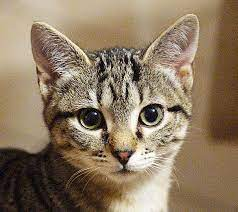

In [ ]:
from IPython.display import Image
img=Image(filename="../input/imagegatto/imagegatto.jpg")
img

In [ ]:
from tensorflow.keras.preprocessing  import image
path2="../input/imagegatto/imagegatto.jpg"

img = image.load_img(path2,target_size = (64,64))


In [ ]:
type(img)

PIL.Image.Image

In [ ]:
x = image.img_to_array(img)


In [ ]:
x.shape

(64, 64, 3)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x = np.expand_dims(x,axis = 0)
x.shape

(1, 64, 64, 3)

In [ ]:
pred = np.argmax(model.predict(x))
pred

0

In [ ]:
index=["animals","birds","flowers"]

In [ ]:
natur1=index[pred]


In [ ]:
natur1

'animals'

In [ ]:
if natur1=="animals":
 a=["gatto","mucca","pecora"]
elif natur1=="birds":
 a=["ANTBIRD","PEACOCK","WILD TURKEY"]
else:
 a=["rose","sunflower","tulip"]

In [ ]:
a

['gatto', 'mucca', 'pecora']

In [ ]:
natur1=a[pred]

In [ ]:
natur1

'gatto'

In [ ]:
model.save_weights("naturalist")